# **Project Name: Data Science Job Salaries**

Contribution - Dinesh Halder

internship ID: UMIP278400

# **Project Overview**

**1. Objective**

* Briefly describe the goal of the project (e.g., predicting salaries using ML models).

**2. Dataset Information**

The dataset contains 607 entries with 12 columns related to job roles and salaries. Key features include:

* Experience Level: Job experience categories (EN, MI, SE, EX).
* Employment Type: Type of employment (FT, PT, CT, FL).
* Job Title: Role of the employee (e.g., Data Scientist, Analyst).
* Company Size: Size of the company (S, M, L).
* Salary (USD): Annual salary in US dollars.
* Company Location and Employee Residence: Geographical information.
* Remote Ratio: Percentage of remote work.

**3. Data Loading and Exploration**

* Load the dataset and perform basic checks (shape, info, null values).
* Display a few sample rows.

**4. Data Preprocessing**

* Drop unnecessary columns.
* Handle missing values (if any).
* Encode categorical variables.
* Detect and handle outliers.
* Exploratory Data Analysis (EDA)

**4. Visualize salary distribution and correlations.**
* Understand relationships between variables.

**5. Model Building**

* Split data into training and testing sets.
* Train multiple regression models (e.g., Decision Tree, Random Forest, Gradient Boosting, etc.).

**6. Model Evaluation and Comparison**

* Calculate performance metrics (R², MAE, MSE, RMSE).

**Conclusion:**
Gradient Boosting and KNN are the most promising models for predicting salaries in this dataset. However, the R² values indicate that further improvements can be made, possibly by feature engineering or hyperparameter tuning.



# **EDA**

## 1. Know Your Data

### Import Libraries

In [ ]:
# Import essential libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

### Dataset Loading

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data_set= pd.read_csv('/content/drive/MyDrive/project internship/Data Science Job Salary/Data Science Job Salaries.csv')
display(data_set)

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
...,...,...,...,...,...,...,...,...,...,...,...,...
602,602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M
603,603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M
604,604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M
605,605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M


### Dataset Overview

In [ ]:
num_rows, num_cols= data_set.shape
print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_cols}")

Number of rows: 607
Number of columns: 12


In [ ]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


In [ ]:
data_set.isnull().sum()

,0
Unnamed: 0,0
work_year,0
experience_level,0
employment_type,0
job_title,0
salary,0
salary_currency,0
salary_in_usd,0
employee_residence,0
remote_ratio,0


In [ ]:
duplicate_rows= data_set.duplicated().sum()
print(duplicate_rows)

0


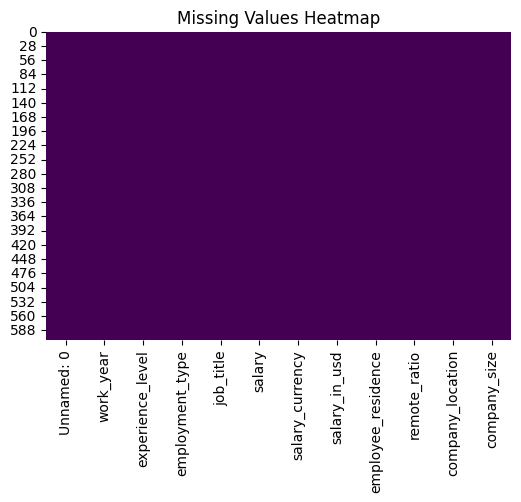

In [ ]:
plt.figure(figsize=(6,4))
sns.heatmap(data_set.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

## 2. Understanding Variables

In [ ]:
data_set.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,607.0,303.000000,1.753701e+02,0.0,151.5,303.0,454.5,606.0
work_year,607.0,2021.405272,6.921330e-01,2020.0,2021.0,2022.0,2022.0,2022.0
salary,607.0,324000.062603,1.544357e+06,4000.0,70000.0,115000.0,165000.0,30400000.0
salary_in_usd,607.0,112297.869852,7.095726e+04,2859.0,62726.0,101570.0,150000.0,600000.0
remote_ratio,607.0,70.922570,4.070913e+01,0.0,50.0,100.0,100.0,100.0


In [ ]:
column_name= list(data_set.columns)
print("---Columns---\n")


for i in range(len(column_name)):
  print(f"{i+1}: {column_name[i]}")


---Columns---

1: Unnamed: 0
2: work_year
3: experience_level
4: employment_type
5: job_title
6: salary
7: salary_currency
8: salary_in_usd
9: employee_residence
10: remote_ratio
11: company_location
12: company_size


In [ ]:
for i in data_set.columns.tolist():
  print(f"Total unique values in {i} : {data_set[i].nunique()}")

Total unique values in Unnamed: 0 : 607
Total unique values in work_year : 3
Total unique values in experience_level : 4
Total unique values in employment_type : 4
Total unique values in job_title : 50
Total unique values in salary : 272
Total unique values in salary_currency : 17
Total unique values in salary_in_usd : 369
Total unique values in employee_residence : 57
Total unique values in remote_ratio : 3
Total unique values in company_location : 50
Total unique values in company_size : 3


In [ ]:
df= data_set.copy()

## 3. Data Vizualization, Storytelling & Experimenting with charts

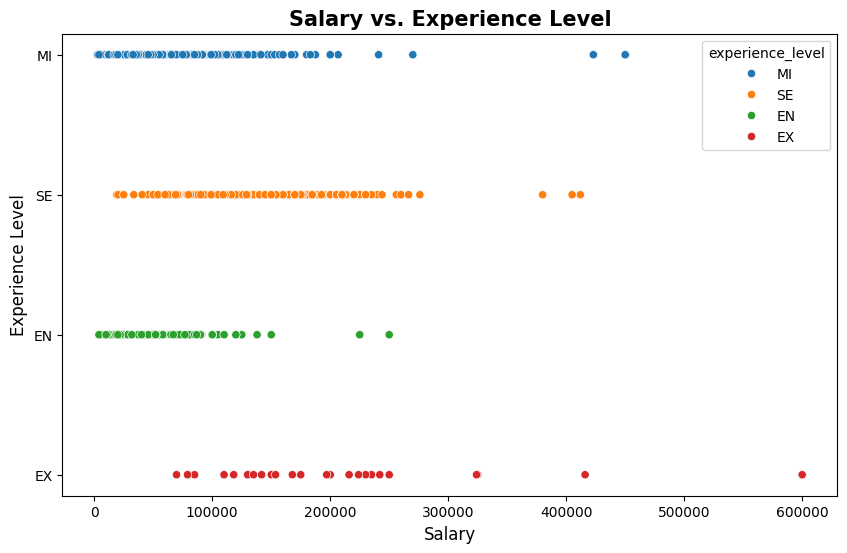

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='salary_in_usd', y='experience_level', hue='experience_level')

plt.xlabel("Salary", fontsize=12)
plt.ylabel("Experience Level", fontsize=12)
plt.title("Salary vs. Experience Level", fontsize=15, fontweight='bold')

plt.show()


In [ ]:
salary_summary= df.groupby('experience_level')['salary_in_usd'].agg(['mean', 'min', 'max']).round(2)
print(salary_summary)

                       mean    min     max
experience_level                          
EN                 61643.32   4000  250000
EX                199392.04  69741  600000
MI                 87996.06   2859  450000
SE                138617.29  18907  412000


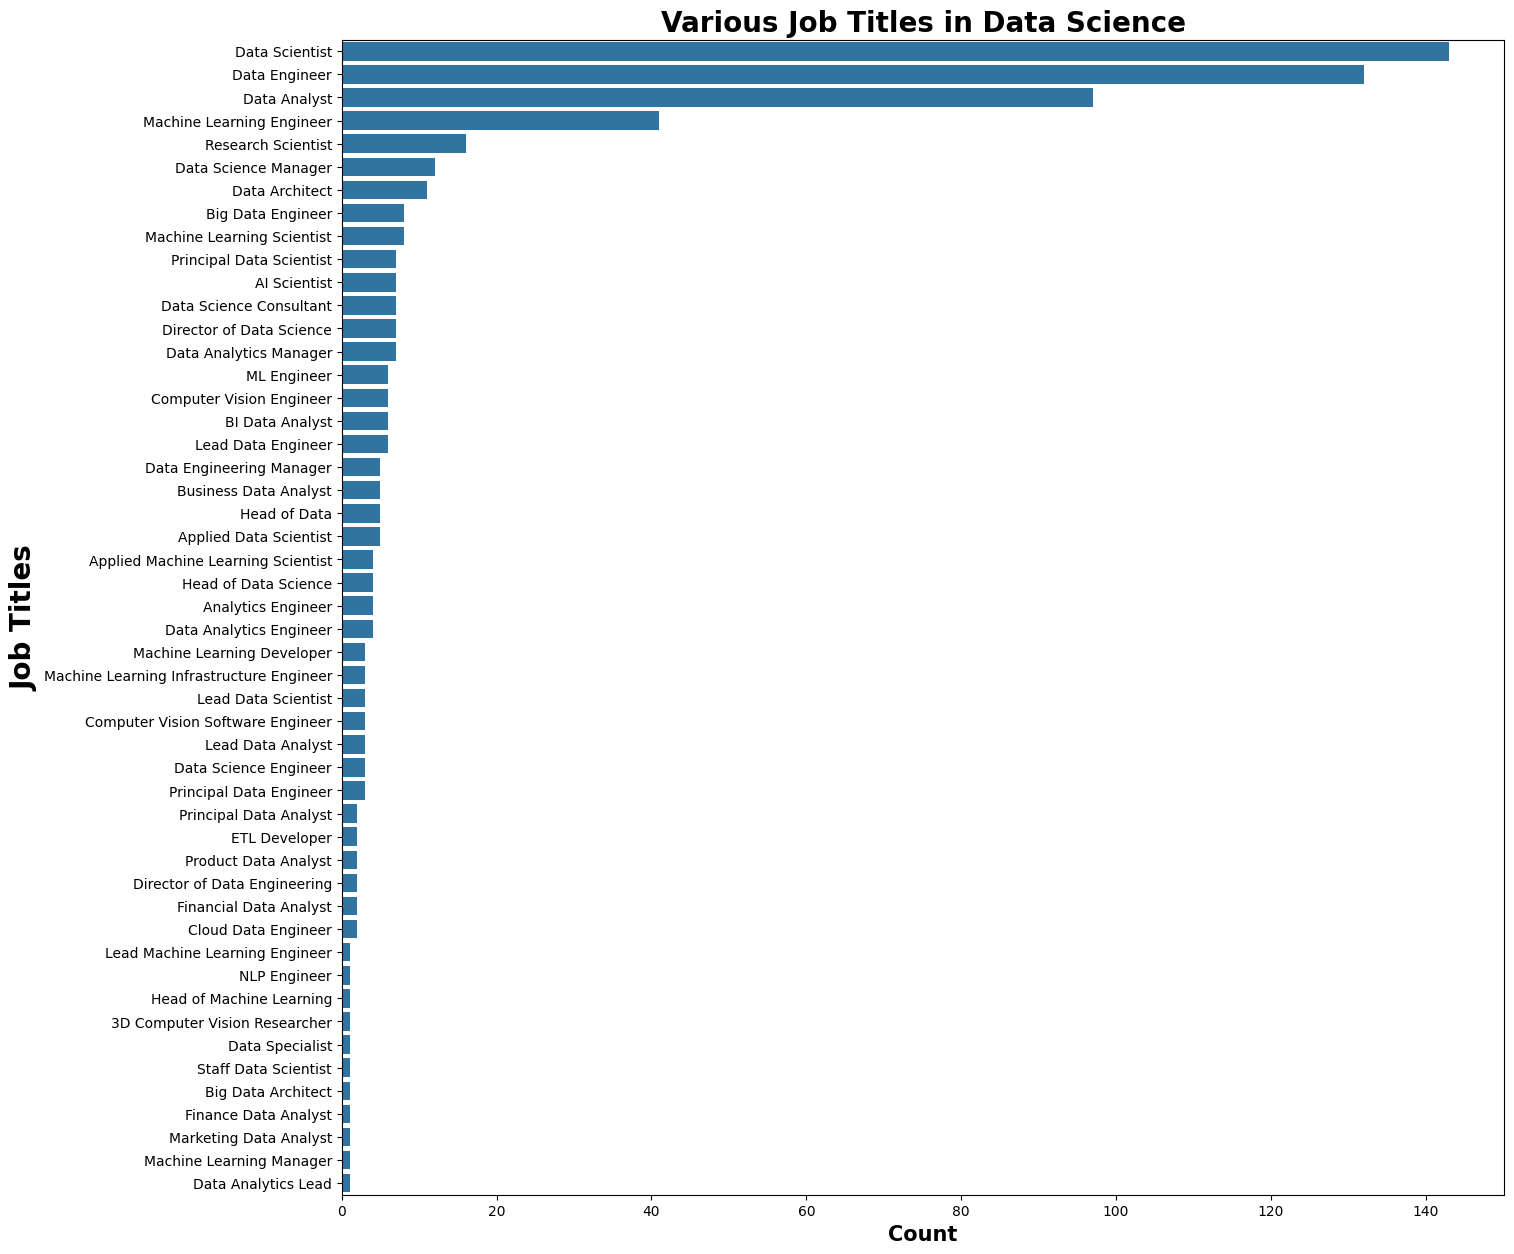

In [ ]:
plt.figure(figsize=(15,15))
plt.title('Various Job Titles in Data Science', fontsize=20, fontweight='bold')
sns.countplot(y='job_title', data=df, order=df['job_title'].value_counts().index)
plt.xlabel('Count', fontsize=15, fontweight='bold')
plt.ylabel('Job Titles', fontsize=20, fontweight='bold')
plt.show()

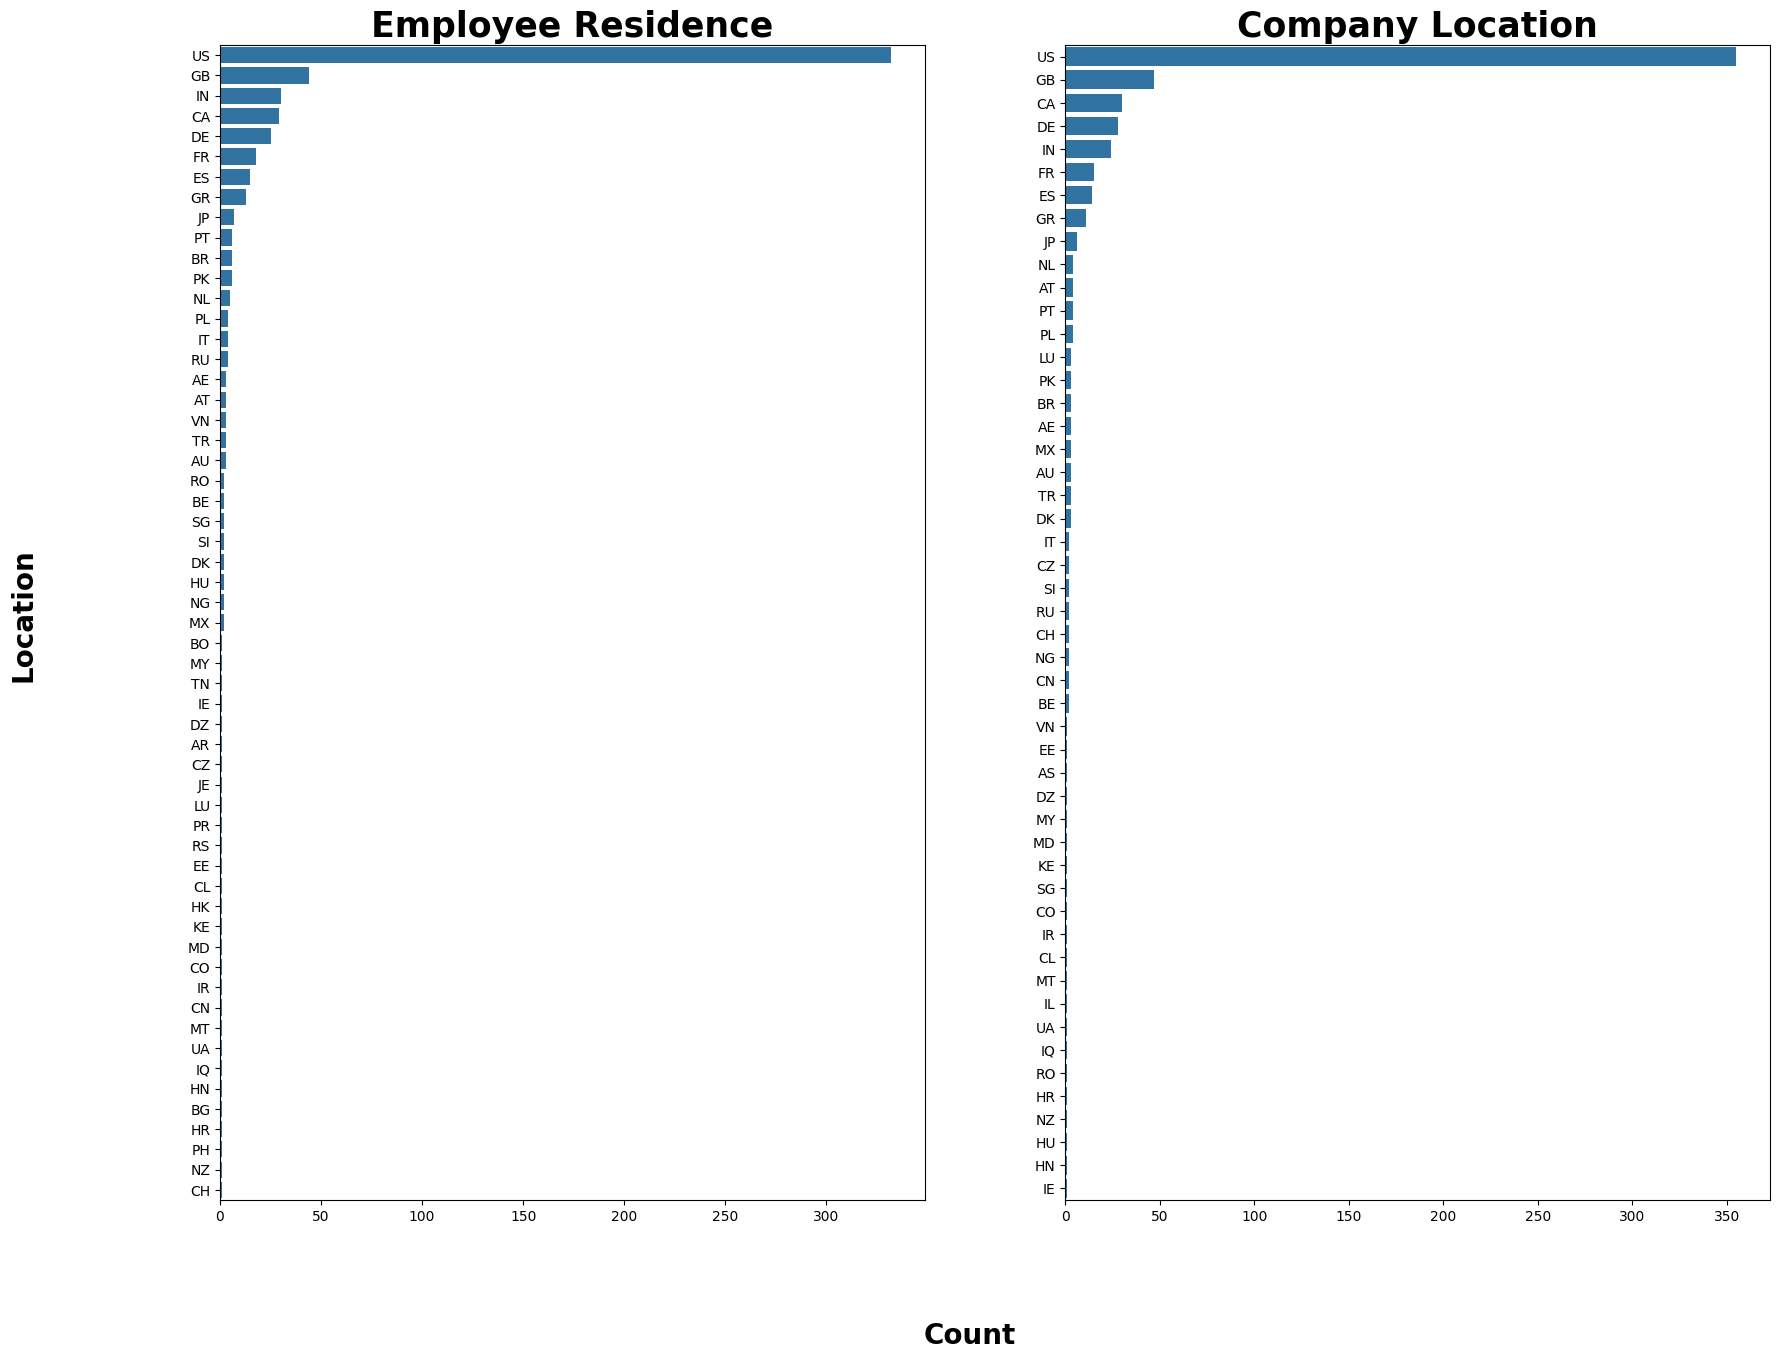

In [ ]:
fig,axes=plt.subplots(1,2,figsize=(20,15))
sns.countplot(ax=axes[0],y='employee_residence', data=df, order=df['employee_residence'].value_counts().index)
sns.countplot(ax=axes[1],y='company_location', data=df,  order=df['company_location'].value_counts().index)

axes[0].set_title('Employee Residence', fontsize=25, fontweight='bold')
axes[0].set(xlabel=None)
axes[0].set(ylabel=None)
axes[1].set_title('Company Location', fontsize=25, fontweight='bold')
axes[1].set(xlabel=None)
axes[1].set(ylabel=None)

fig.supxlabel('Count', fontsize=20, fontweight='bold')
fig.supylabel('Location', fontsize=20, fontweight='bold')

plt.show()

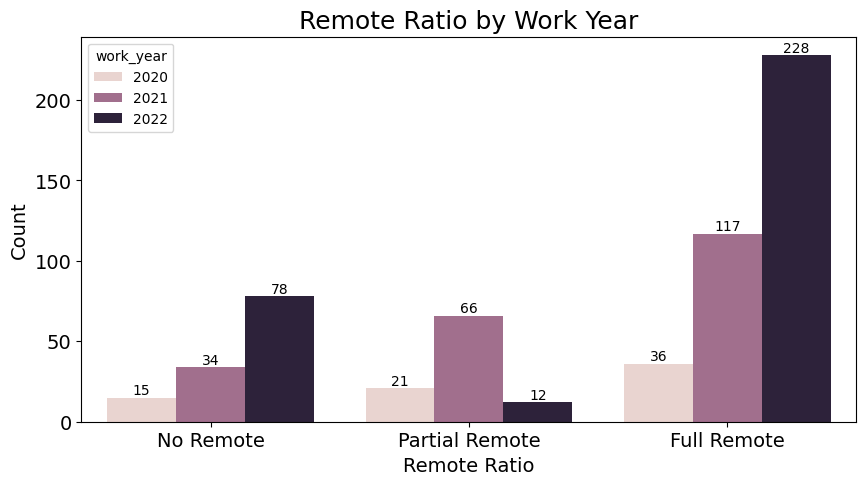

In [ ]:
Mapping = {0: "No Remote", 50: "Partial Remote", 100: "Full Remote"}
df1 = df.copy()
df1["remote_ratio"]=df["remote_ratio"].map(Mapping)
plt.figure(figsize=(10,5))
plt.title("Remote Ratio by Work Year", fontsize=18)
ax = sns.countplot(x='remote_ratio', data=df1, hue = 'work_year')
for i in ax.containers:
    ax.bar_label(i)
plt.xlabel("Remote Ratio", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

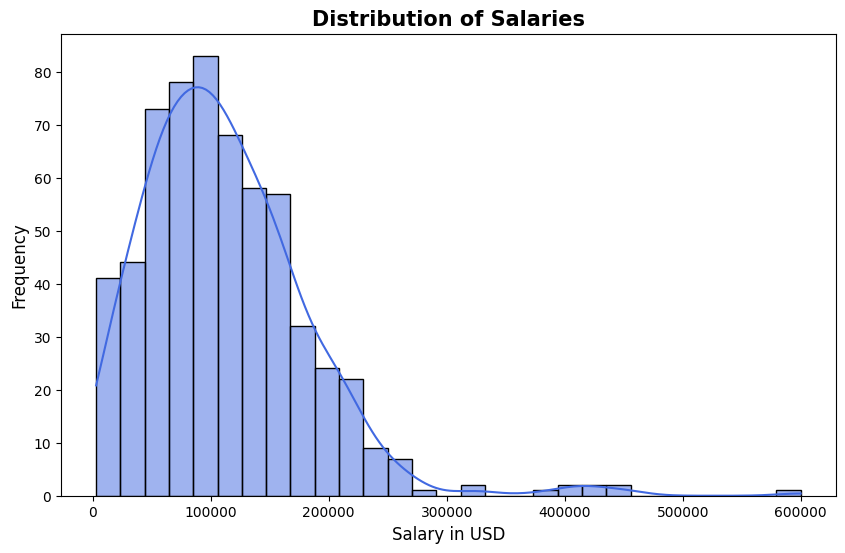

In [ ]:

plt.figure(figsize=(10,6))
sns.histplot(data=df, x='salary_in_usd', kde=True, color="royalblue", edgecolor="black")

plt.xlabel("Salary in USD", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.title("Distribution of Salaries", fontsize=15, fontweight='bold')
plt.show()


<ipython-input-22-1d4187e9ad71>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='employment_type', y='salary_in_usd',palette='Set2')


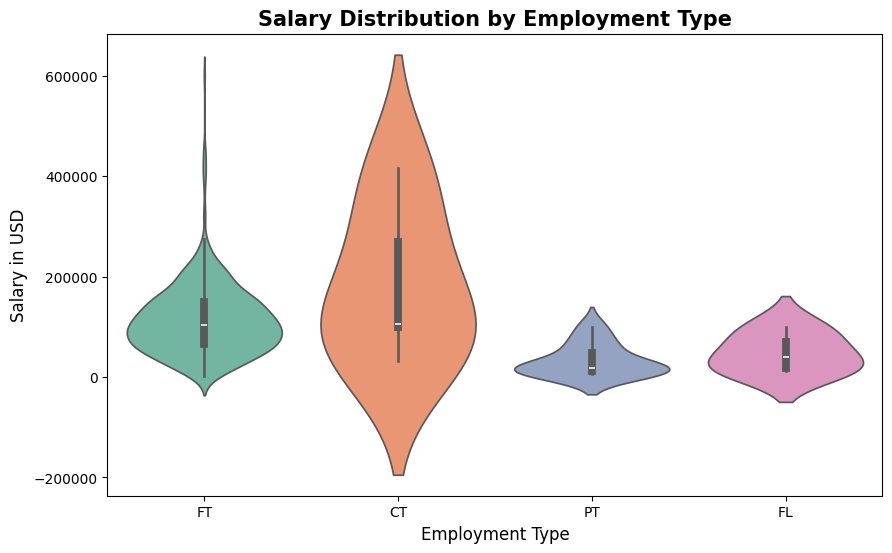

In [ ]:
plt.figure(figsize=(10,6))
sns.violinplot(data=df, x='employment_type', y='salary_in_usd',palette='Set2')

plt.xlabel('Employment Type',fontsize=12)
plt.ylabel('Salary in USD',fontsize=12)
plt.title('Salary Distribution by Employment Type',fontsize=15,fontweight='bold')

plt.show()

Text(0.5, 1.0, 'Feature Correlation Heatmap')

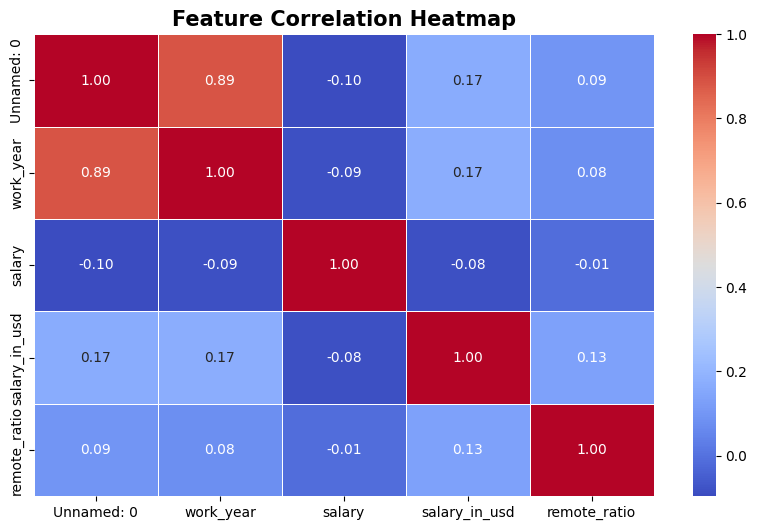

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(df.select_dtypes(include=np.number).corr(),annot=True,cmap='coolwarm',fmt=".2f",linewidths=0.5)

plt.title("Feature Correlation Heatmap",fontsize=15,fontweight='bold')

<ipython-input-24-0110f7c6eee4>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_jobs.values, y=top_jobs.index, palette="magma")


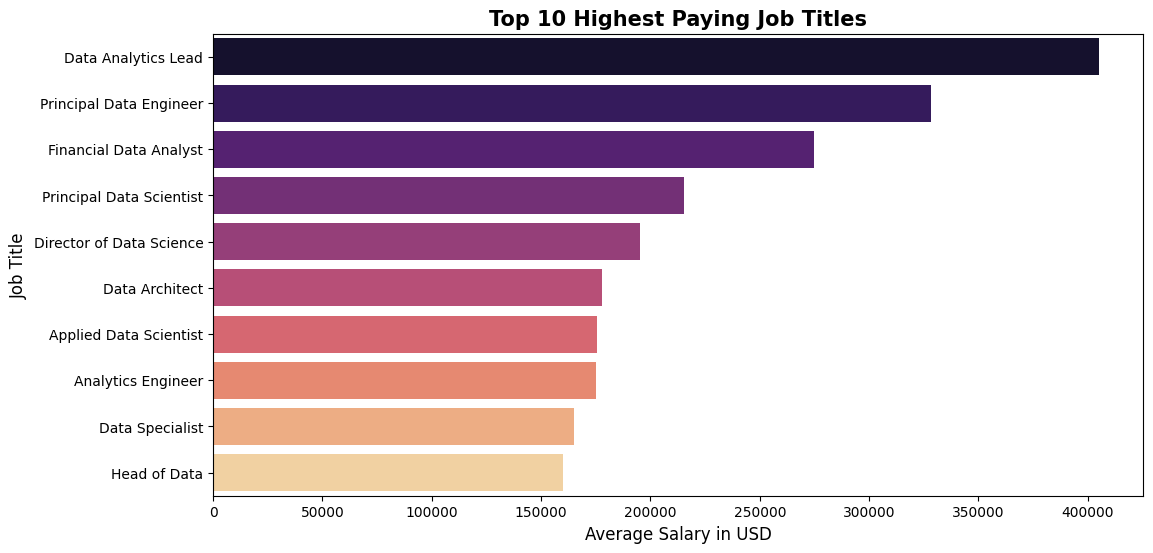

In [ ]:
top_jobs = df.groupby("job_title")['salary_in_usd'].mean().nlargest(10)

plt.figure(figsize=(12,6))
sns.barplot(x=top_jobs.values, y=top_jobs.index, palette="magma")

plt.xlabel("Average Salary in USD", fontsize=12)
plt.ylabel("Job Title", fontsize=12)
plt.title("Top 10 Highest Paying Job Titles", fontsize=15, fontweight='bold')
plt.show()


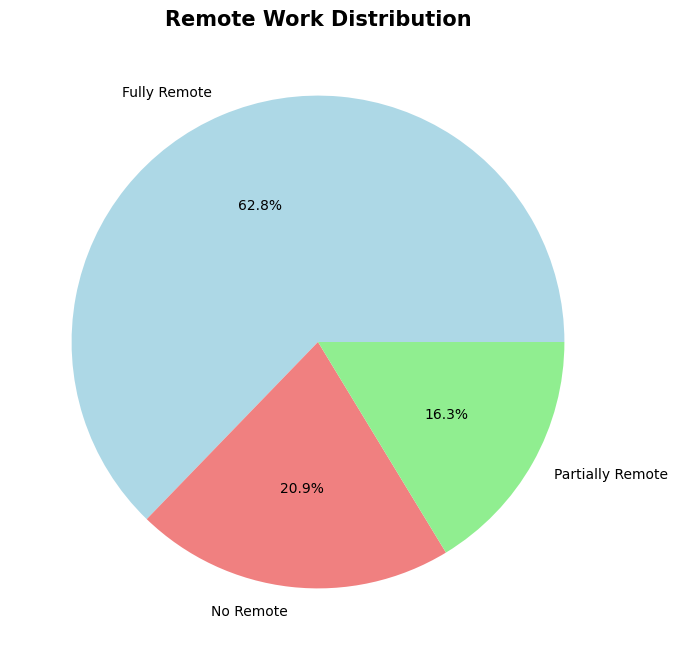

In [ ]:
# Mapping numeric values to categories
remote_mapping = {0: "No Remote", 50: "Partially Remote", 100: "Fully Remote"}
df["remote_category"] = df["remote_ratio"].map(remote_mapping)




plt.figure(figsize=(8,8))
df["remote_category"].value_counts().plot.pie(autopct='%1.1f%%', colors=['lightblue', 'lightcoral', 'lightgreen'])

plt.title("Remote Work Distribution", fontsize=15, fontweight='bold')
plt.ylabel("")
plt.show()


<ipython-input-26-77dec4cd6e73>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="remote_category", y="salary_in_usd", palette="magma")


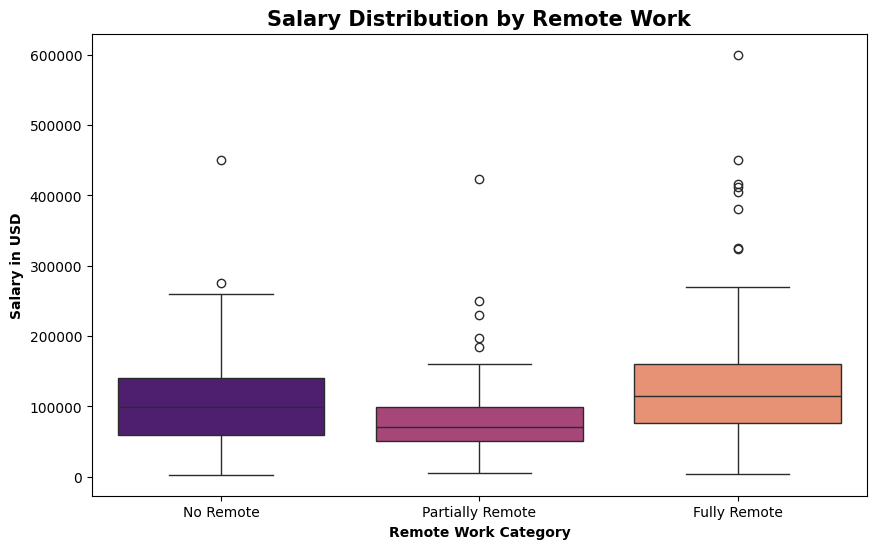

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x="remote_category", y="salary_in_usd", palette="magma")

plt.xlabel("Remote Work Category", fontsize=10,fontweight='bold')
plt.ylabel("Salary in USD", fontsize=10,fontweight='bold')
plt.title("Salary Distribution by Remote Work", fontsize=15, fontweight='bold')
plt.show()


<ipython-input-27-15316bd9a7c4>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(data=df, x='company_size', y='salary_in_usd', palette='viridis')


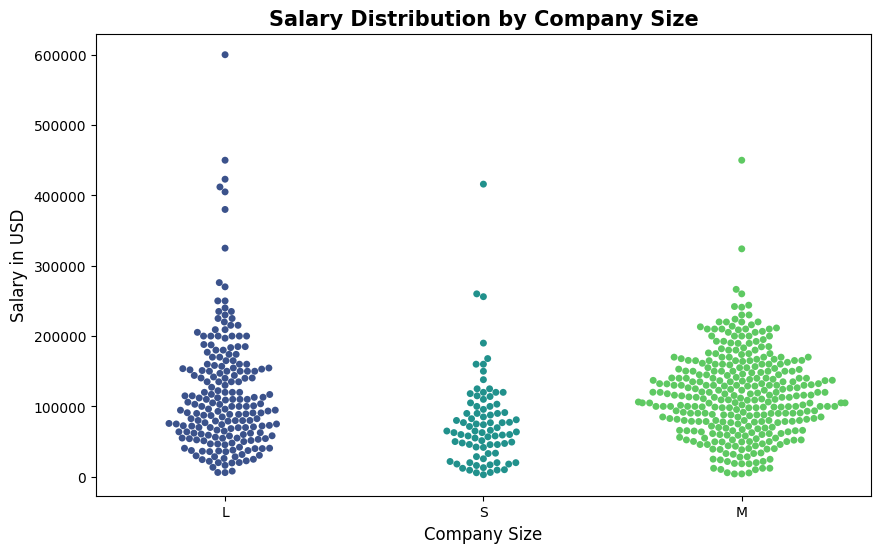

In [ ]:
plt.figure(figsize=(10,6))
sns.swarmplot(data=df, x='company_size', y='salary_in_usd', palette='viridis')

plt.xlabel("Company Size", fontsize=12)
plt.ylabel("Salary in USD", fontsize=12)
plt.title("Salary Distribution by Company Size", fontsize=15, fontweight='bold')
plt.show()


<ipython-input-28-0ca4aa2b65e7>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_top, x="company_location", y="salary_in_usd", palette="viridis")
<ipython-input-28-0ca4aa2b65e7>:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=df_top, x="company_location", y="salary_in_usd", palette="viridis")


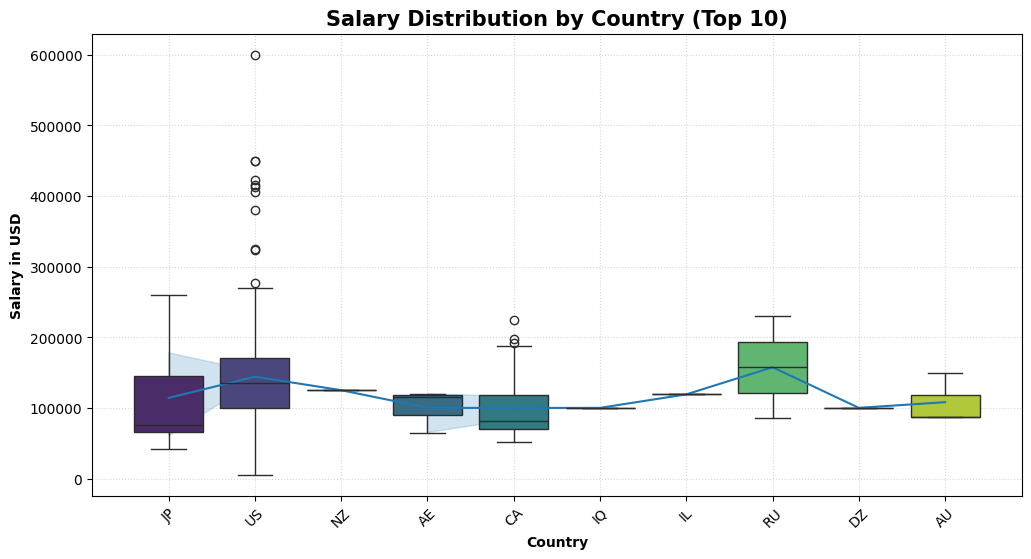

In [ ]:

top_countries = df.groupby("company_location")["salary_in_usd"].mean().nlargest(10).index
df_top = df[df["company_location"].isin(top_countries)]

plt.figure(figsize=(12, 6))
sns.boxplot(data=df_top, x="company_location", y="salary_in_usd", palette="viridis")
sns.lineplot(data=df_top, x="company_location", y="salary_in_usd", palette="viridis")
plt.xlabel("Country", fontsize=10, fontweight='bold')
plt.ylabel("Salary in USD", fontsize=10, fontweight='bold')
plt.title("Salary Distribution by Country (Top 10)", fontsize=15, fontweight='bold')

plt.grid(True, linestyle="dotted", alpha=0.5)
plt.xticks(rotation=45)
plt.show()


# **Model Implimentation**

## 1. Data Preprocessing

In [ ]:
# Define Q1 (25th percentile) and Q3 (75th percentile)
Q1= df['salary_in_usd'].quantile(0.25)
Q3= df['salary_in_usd'].quantile(0.75)

# Calculate Interquartile Range (IQR)
IQR= Q3-Q1

# Define lower and upper bounds for outliers
lower_bound= Q1-1.5*IQR
upper_bound = Q3+1.5*IQR

print(f"Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")


Lower Bound: -68185.0, Upper Bound: 280911.0


In [ ]:
# Remove outliers
df_clean= df[(df['salary_in_usd']>=lower_bound) & (df['salary_in_usd']<=upper_bound)]

# Print before & after removing outliers
print(f"Original dataset size: {df.shape[0]}")
print(f"Dataset size after removing outliers: {df_clean.shape[0]}")

Original dataset size: 607
Dataset size after removing outliers: 597


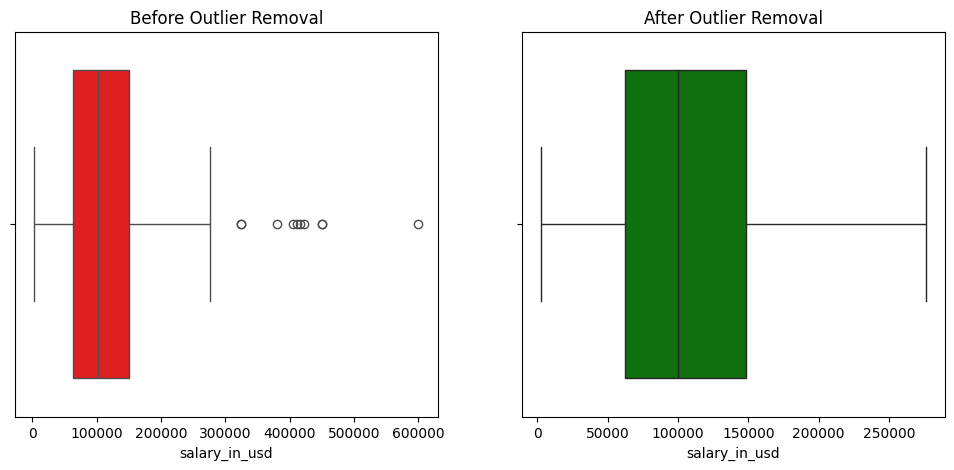

In [ ]:
plt.figure(figsize=(12, 5))

# Boxplot before outlier removal
plt.subplot(1, 2, 1)
sns.boxplot(x=df['salary_in_usd'], color='red')
plt.title("Before Outlier Removal")

# Boxplot after outlier removal
plt.subplot(1, 2, 2)
sns.boxplot(x=df_clean['salary_in_usd'], color='green')
plt.title("After Outlier Removal")

plt.show()


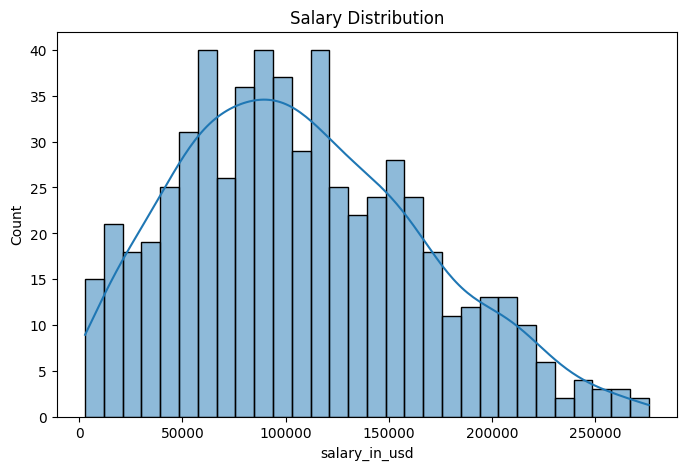

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.histplot(df_clean['salary_in_usd'], bins=30, kde=True)
plt.title('Salary Distribution')
plt.show()

In [ ]:
df_encode= df_clean.copy()

In [ ]:
df_encode=df_encode.drop(columns=['Unnamed: 0','work_year','salary','salary_currency','employee_residence','remote_ratio'])

In [ ]:
df_encode1= df_encode.copy() # for another training

In [ ]:
!pip install category_encoders


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 5.6 MB/s eta 0:00:00


In [ ]:
df_encode.head(5)

,experience_level,employment_type,job_title,salary_in_usd,company_location,company_size,remote_category
0,MI,FT,Data Scientist,79833,DE,L,No Remote
1,SE,FT,Machine Learning Scientist,260000,JP,S,No Remote
2,SE,FT,Big Data Engineer,109024,GB,M,Partially Remote
3,MI,FT,Product Data Analyst,20000,HN,S,No Remote
4,SE,FT,Machine Learning Engineer,150000,US,L,Partially Remote


In [ ]:
df_encode=df_encode.drop(columns=['job_title','company_location'])

In [ ]:
Mapping= {'EN': 0, 'MI': 1, 'SE': 2, 'EX': 3}
df_encode['experience_level']= df_encode['experience_level'].map(Mapping)

Mapping= {'S': 0, 'M': 1, 'L': 2}
df_encode['company_size']= df_encode['company_size'].map(Mapping)

In [ ]:
import category_encoders as ce
binary_enc= ce.BinaryEncoder(cols=['employment_type','remote_category'])
df_encode= binary_enc.fit_transform(df_encode)

In [ ]:
df_encode.head(5)

,experience_level,employment_type_0,employment_type_1,employment_type_2,salary_in_usd,company_size,remote_category_0,remote_category_1
0,1,0,0,1,79833,2,0,1
1,2,0,0,1,260000,0,0,1
2,2,0,0,1,109024,1,1,0
3,1,0,0,1,20000,0,0,1
4,2,0,0,1,150000,2,1,0


## 2. Model coding

In [ ]:
# Load Data Set

X= df_encode.drop(columns=['salary_in_usd'])
y= df_encode['salary_in_usd']

In [ ]:
# Train And Test Split

X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.2, random_state=42)

In [ ]:
# Regression Models: Tree Based Model
models={
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(n_estimators=100),
    "Gradient Boosting": GradientBoostingRegressor(),
}

# Train and Evaluate
results=[]
for name,model in models.items():
  model.fit(X_train,y_train)
  y_pred=model.predict(X_test)

  r2=r2_score(y_test, y_pred)
  mae=mean_absolute_error(y_test,y_pred)
  mse=mean_squared_error(y_test,y_pred)
  rmse=np.sqrt(mse)

  results.append([name,r2,mae,mse,rmse])

results_df1=pd.DataFrame(results, columns=["Model","r2","mae","mse","rmse"])

# Format the columns (keep r2 unchanged, round others to 2 decimal places)
results_df1["mae"]=results_df1["mae"].apply(lambda x: f"{x:.2f}")
results_df1["mse"]=results_df1["mse"].apply(lambda x: f"{x:.2f}")
results_df1["rmse"]=results_df1["rmse"].apply(lambda x: f"{x:.2f}")
results_df1["r2"]=results_df1["r2"].apply(lambda x: f"{x:.2f}")

# Display results
display(results_df1)


,Model,r2,mae,mse,rmse
0,Decision Tree,0.09,38098.14,2413133767.42,49123.66
1,Random Forest,0.21,37030.96,2108553128.82,45918.98
2,Gradient Boosting,0.22,36446.77,2069643489.27,45493.33


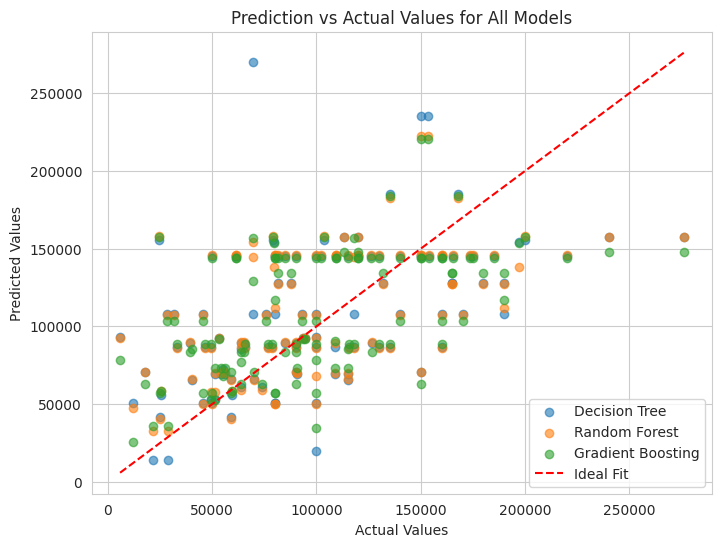

In [ ]:

plt.figure(figsize=(8, 6))
sns.set_style("whitegrid")

# Loop through each model and plot predictions
for name,model in models.items():
    y_pred=model.predict(X_test)  # Get predictions
    plt.scatter(y_test,y_pred,alpha=0.6,label=name)  # Scatter plot

# Plot Ideal Fit Line (y = x)
min_val=min(y_test.min(),min([model.predict(X_test).min() for model in models.values()]))
max_val=max(y_test.max(),max([model.predict(X_test).max() for model in models.values()]))
plt.plot([min_val,max_val],[min_val, max_val],color="red",linestyle="--",label="Ideal Fit")

# Labels and Title
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Prediction vs Actual Values for All Models")
plt.legend()
plt.show()




In [ ]:
scaler_y=StandardScaler()
y_train_scaled=scaler_y.fit_transform(y_train.values.reshape(-1, 1))
y_test_scaled=scaler_y.transform(y_test.values.reshape(-1, 1))


In [ ]:
models= {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.1),
    "SVR": SVR(kernel="rbf"),
    "KNN": KNeighborsRegressor(n_neighbors=5),
    "XGBRegressor": XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42)
}


results=[]
for name,model in models.items():
    if name=="XGBRegressor":
        model.fit(X_train, y_train)  # No scaling for XGB
        y_pred=model.predict(X_test)
    else:
        model.fit(X_train, y_train_scaled)  # Train with scaled y
        y_pred_scaled=model.predict(X_test)  # Predict in scaled form

        # Inverse transform predictions to original scale
        y_pred=scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).ravel()

    # Evaluate performance with unscaled y_test
    r2=r2_score(y_test, y_pred)
    mae=mean_absolute_error(y_test, y_pred)
    mse=mean_squared_error(y_test, y_pred)
    rmse=np.sqrt(mse)

    results.append([name,r2,mae,mse,rmse])

# Convert results into DataFrame
results_df2=pd.DataFrame(results, columns=["Model","r2","mae","mse","rmse"])

results_df2[["mae","mse","rmse","r2"]]=results_df2[["mae","mse","rmse","r2"]].round(2)

# Display results
display(results_df2)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,Model,r2,mae,mse,rmse
0,Linear Regression,0.21,37613.38,2.098163e+09,45805.71
1,Ridge Regression,0.22,37487.98,2.085934e+09,45672.02
2,Lasso Regression,0.25,36235.38,1.990854e+09,44618.98
3,SVR,0.24,35614.57,2.023064e+09,44978.48
4,KNN,0.26,36811.22,1.961322e+09,44286.81
5,XGBRegressor,0.20,37094.20,2.131394e+09,46167.03


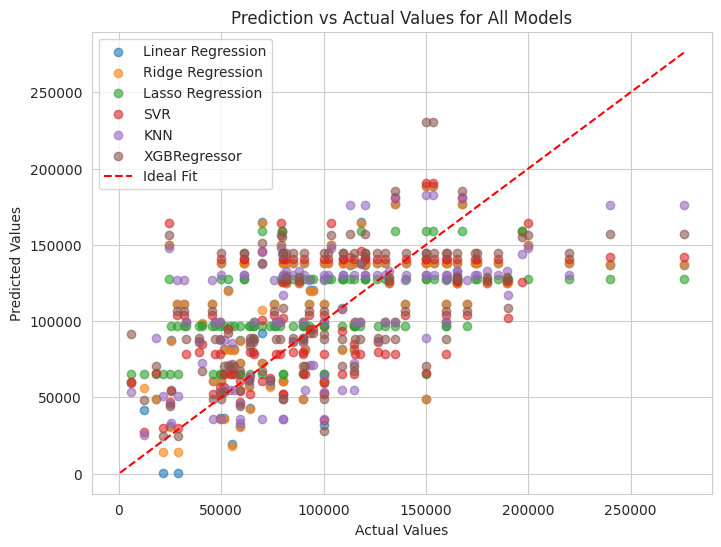

In [ ]:
plt.figure(figsize=(8, 6))
sns.set_style("whitegrid")

# Loop through each model and plot predictions
for name,model in models.items():
    if name=="XGBRegressor":
        y_pred=model.predict(X_test)  # No scaling needed
    else:
        y_pred_scaled=model.predict(X_test)  # Predict in scaled form
        y_pred=scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).ravel()  # Unscale

    plt.scatter(y_test,y_pred,alpha=0.6,label=name)  # Scatter plot

# Plot Ideal Fit Line (y = x)
min_val=min(y_test.min(), min([scaler_y.inverse_transform(model.predict(X_test).reshape(-1, 1)).min() if name!="XGBRegressor" else model.predict(X_test).min() for name,model in models.items()]))
max_val=max(y_test.max(),max([scaler_y.inverse_transform(model.predict(X_test).reshape(-1, 1)).max() if name!="XGBRegressor" else model.predict(X_test).max() for name,model in models.items()]))

plt.plot([min_val, max_val],[min_val, max_val],color="red",linestyle="--",label="Ideal Fit")

# Labels and Title
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Prediction vs Actual Values for All Models")
plt.legend()
plt.show()


In [ ]:
df_combined=pd.concat([results_df1,results_df2],ignore_index=True)
display(df_combined)

,Model,r2,mae,mse,rmse
0,Decision Tree,0.09,38098.14,2413133767.42,49123.66
1,Random Forest,0.21,37030.96,2108553128.82,45918.98
2,Gradient Boosting,0.22,36446.77,2069643489.27,45493.33
3,Linear Regression,0.21,37613.38,2098163466.56,45805.71
4,Ridge Regression,0.22,37487.98,2085933648.56,45672.02
5,Lasso Regression,0.25,36235.38,1990853514.5,44618.98
6,SVR,0.24,35614.57,2023063717.19,44978.48
7,KNN,0.26,36811.22,1961321732.18,44286.81
8,XGBRegressor,0.2,37094.2,2131394432.0,46167.03
